In [1]:
##### VGME Stock Price Analysis Code
# Dependencies

import gmaps
import numpy as np
import pandas as pd

import requests
import json

import scipy.stats as st
from scipy.stats import linregress

from matplotlib import pyplot as plt

from pprint import pprint

from random import seed
from random import randint

# Time calculations
import time
import datetime
# from datetime import datetime
from time import strftime

# Printing and Output Controls
import sys
import os,csv

In [2]:
# Set up output path 
Output_Data_Path_Folder = "../Output" 
Reddit_Data_Input_Path = "../Data/reddit_data_with_tag_counts-2020-12-01_Forwardx.csv"
Stock_Data_Input_Path = "../Data/stock_days_of_interest_df_CSV_Output.csv"

In [9]:
# read in the csv created in the WeatherPy section
stock_data_df = pd.read_csv(Stock_Data_Input_Path,dtype="object", encoding="utf-8")
reddit_data_df = pd.read_csv(Reddit_Data_Input_Path,dtype="object", encoding="utf-8")

In [10]:
# Fix and Check Stock data
# Fix data types
stock_data_df[['Open','High','Low','Close','Adj Close','Volume','Change','Abs_Change']] = stock_data_df[['Open','High','Low','Close','Adj Close','Volume','Change','Abs_Change']].astype(float)
print(stock_data_df.dtypes)
stock_data_df.head(2)

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
Volume        float64
Stock_Date     object
Change        float64
Abs_Change    float64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume,Stock_Date,Change,Abs_Change
0,12/1/2020,17.110001,17.40,15.76,15.80,15.80,12666000.0,2020-12-01,-1.310001,1.310001
1,12/2/2020,15.700000,16.68,15.38,16.58,16.58,7883400.0,2020-12-02,0.880000,0.880000


In [19]:
# Fix and Check Message data
# Fix data types
reddit_data_df[['num_comments','Reddit_Total']] = reddit_data_df[['num_comments','Reddit_Total']].astype(float)
reddit_data_df = reddit_data_df.rename(columns = {'Date1':'Date'})
print(reddit_data_df.dtypes)
reddit_data_df.head(2)

title            object
num_comments    float64
Date Stamp       object
Reddit_Total    float64
tag_count        object
Date             object
dtype: object


,title,num_comments,Date Stamp,Reddit_Total,tag_count,Date
0,your game stops here!!,0.0,1/31/2021 09:10,1.0,1,1/31/2021
1,beware of the tactic 2.0 ???§????gme amc????,0.0,1/31/2021 09:10,1.0,1,1/31/2021


In [20]:
reddit_daily_df = pd.DataFrame(reddit_data_df.groupby('Date')['Reddit_Total'].sum())
print(reddit_daily_df)

           Reddit_Total
Date                   
1/1/2021         1914.0
1/10/2021        1339.0
1/11/2021        3753.0
1/12/2021        1815.0
1/13/2021       14878.0
...                 ...
12/5/2020        1060.0
12/6/2020         698.0
12/7/2020         844.0
12/8/2020        9905.0
12/9/2020        2754.0

[62 rows x 1 columns]


In [29]:
merge_GMEreddit_df = pd.merge(stock_data_df, reddit_daily_df, on="Date")
merge_GMEreddit_df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock_Date,Change,Abs_Change,Reddit_Total
0,12/1/2020,17.110001,17.4,15.76,15.8,15.8,12666000.0,2020-12-01,-1.310001,1.310001,3071.0


Line graph for GME Stock Price by Date




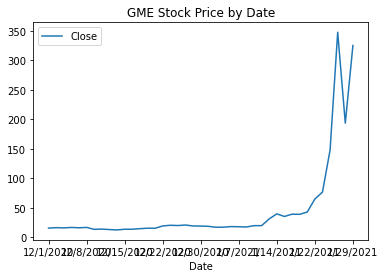

In [30]:
# Plot Stock information by Date
print(f"Line graph for GME Stock Price by Date\n\n") 
Stock_Data_Graph = merge_GMEreddit_df.plot(x='Date', y="Close", kind="line",title=f"GME Stock Price by Date")

# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'Check_Combined_data_Stock_Price_By_Date.png'))
plt.show()

Line graph for Reddit message volume by Date




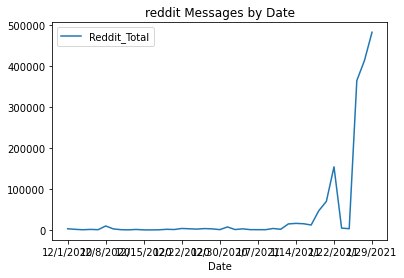

In [31]:
# Plot Message information by Date
print(f"Line graph for Reddit message volume by Date\n\n") 
message_Data_Graph = merge_GMEreddit_df.plot(x='Date', y="Reddit_Total", kind="line",title=f"reddit Messages by Date")

# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'Check_Combined_data_Message_By_Date.png'))
plt.show()

In [32]:
# Create lags and differentials 
for i in range(0, len(merge_GMEreddit_df)):
    merge_GMEreddit_df.loc[i, 'Plot_Date']     = datetime.datetime.strptime((merge_GMEreddit_df.loc[i,"Date"]),'%m/%d/%Y')
        
    if i > 0:
        merge_GMEreddit_df.loc[i, 'Reddit_Total_1_Day_Ago'] = merge_GMEreddit_df.loc[i-1,'Reddit_Total']

    if i > 1:
        merge_GMEreddit_df.loc[i, 'Reddit_Total_2_Day_Ago'] = merge_GMEreddit_df.loc[i-2,'Reddit_Total']
         
    if i > 2:
        merge_GMEreddit_df.loc[i, 'Reddit_Total_3_Day_Ago'] = merge_GMEreddit_df.loc[i-3,'Reddit_Total']


In [34]:
merge_GMEreddit_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock_Date,Change,Abs_Change,Reddit_Total,Plot_Date,Reddit_Total_1_Day_Ago,Reddit_Total_2_Day_Ago,Reddit_Total_3_Day_Ago
0,12/1/2020,17.110001,17.40,15.76,15.80,15.80,12666000.0,2020-12-01,-1.310001,1.310001,3071.0,2020-12-01,NaN,NaN,NaN
1,12/2/2020,15.700000,16.68,15.38,16.58,16.58,7883400.0,2020-12-02,0.880000,0.880000,1709.0,2020-12-02,3071.0,NaN,NaN


Scatter Plot for GME Stock Abs Change versus Reddit Messages (Same Day)




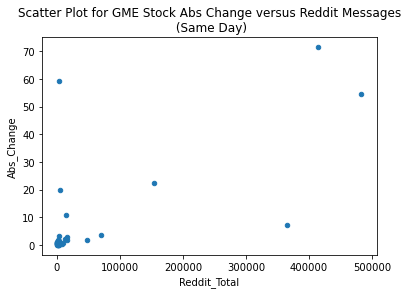

In [35]:
# Plot Stock information by Date
print(f"Scatter Plot for GME Stock Abs Change versus Reddit Messages (Same Day)\n\n") 
Message_0_Graph = merge_GMEreddit_df.plot(x='Reddit_Total', y="Abs_Change", kind="scatter",title=f"Scatter Plot for GME Stock Abs Change versus Reddit Messages\n (Same Day)")

# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'GME_Abs_versus_Same_Day_Reddit.png'))
plt.show()

Scatter Plot for GME Stock Abs Change versus Reddit Messages (Day -1)




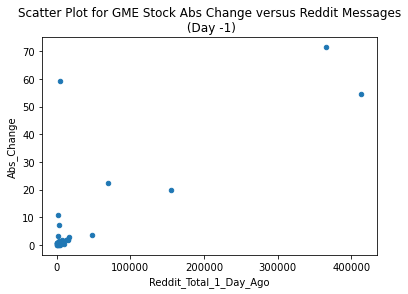

In [37]:
# Plot Stock information by Date
print(f"Scatter Plot for GME Stock Abs Change versus Reddit Messages (Day -1)\n\n") 
Message_1_Graph = merge_GMEreddit_df.plot(x='Reddit_Total_1_Day_Ago', y="Abs_Change", kind="scatter",title=f"Scatter Plot for GME Stock Abs Change versus Reddit Messages\n (Day -1)")

# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'GME_Abs_versus_Same_Day_1_Reddit.png'))
plt.show()

Scatter Plot for GME Stock Abs Change versus Reddit Messages (Day -2)




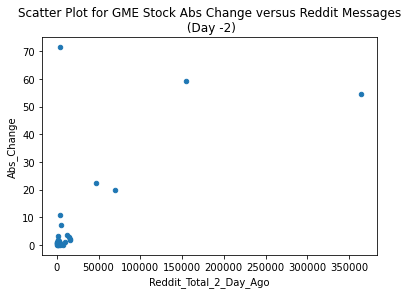

In [39]:
# Plot Stock information by Date
print(f"Scatter Plot for GME Stock Abs Change versus Reddit Messages (Day -2)\n\n") 
Message_2_Graph = merge_GMEreddit_df.plot(x='Reddit_Total_2_Day_Ago', y="Abs_Change", kind="scatter",title=f"Scatter Plot for GME Stock Abs Change versus Reddit Messages\n (Day -2)")

# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'GME_Abs_versus_Same_Day_2_Reddit.png'))
plt.show()

Scatter Plot for GME Stock Abs Change versus Reddit Messages (Day -3)




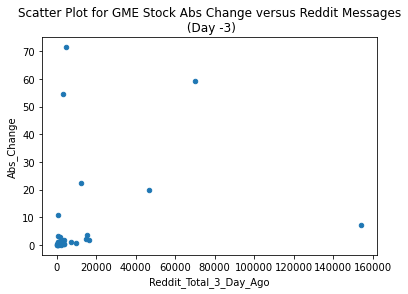

In [40]:
# Plot Stock information by Date
print(f"Scatter Plot for GME Stock Abs Change versus Reddit Messages (Day -3)\n\n") 
Message_3_Graph = merge_GMEreddit_df.plot(x='Reddit_Total_3_Day_Ago', y="Abs_Change", kind="scatter",title=f"Scatter Plot for GME Stock Abs Change versus Reddit Messages\n (Day -3)")

# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'GME_Abs_versus_Same_Day_3_Reddit.png'))
plt.show()